In [22]:
import numpy as np
import pandas as pd
import keras
from matplotlib import pyplot as plt

In [2]:
train_dat = pd.read_csv('fashion-mnist_train.csv')

In [3]:
train_dat.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train_dat.iloc[:,0].values

In [5]:
Y_train.shape
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train)
Y_train.shape

(60000, 10)

In [6]:
X_train = train_dat.iloc[:,1:].values
X_train.shape

(60000, 784)

In [7]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout,Flatten

In [35]:
model = Sequential()
model.add(Convolution2D(16, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Convolution2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(64, (3,3), activation= 'relu'))

model.add(Convolution2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(rate = 0.4))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
__________

In [36]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
test_data = pd.read_csv('fashion-mnist_test.csv')

In [38]:
X_test = test_data.iloc[:,1:].values
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [39]:
Y_test = test_data.iloc[:,0].values
Y_test = np_utils.to_categorical(Y_test)
Y_test.shape

(10000, 10)

In [41]:
hist = model.fit(X_train,Y_train,
                 epochs=35,
                 shuffle=True,
                 batch_size=16,
                 validation_data = (X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [==============================] - 244s - loss: 0.5250 - acc: 0.8073 - val_loss: 0.3355 - val_acc: 0.8770
Epoch 2/35
60000/60000 [==============================] - 215s - loss: 0.3780 - acc: 0.8655 - val_loss: 0.2887 - val_acc: 0.8952
Epoch 3/35
60000/60000 [==============================] - 212s - loss: 0.3379 - acc: 0.8794 - val_loss: 0.2725 - val_acc: 0.9024
Epoch 4/35
60000/60000 [==============================] - 211s - loss: 0.3176 - acc: 0.8868 - val_loss: 0.2787 - val_acc: 0.8972
Epoch 5/35
60000/60000 [==============================] - 213s - loss: 0.2998 - acc: 0.8926 - val_loss: 0.2946 - val_acc: 0.8920
Epoch 6/35
60000/60000 [==============================] - 213s - loss: 0.2896 - acc: 0.8956 - val_loss: 0.2537 - val_acc: 0.9087
Epoch 7/35
60000/60000 [==============================] - 216s - loss: 0.2823 - acc: 0.8992 - val_loss: 0.2676 - val_acc: 0.9074
Epoch 8/35
60000/60000 [=======================

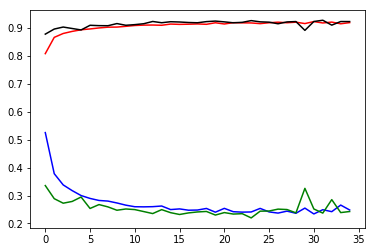

In [42]:
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.plot(hist.history['loss'],'b')
plt.plot(hist.history['val_loss'],'g')
plt.show()